In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import datetime

mnist = tf.keras.datasets.mnist

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

model.fit(x_train, y_train, epochs=10, validation_data=(
    x_test, y_test), callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2640 - accuracy: 0.9239 - val_loss: 0.1438 - val_accuracy: 0.9549
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1076 - accuracy: 0.9664 - val_loss: 0.1097 - val_accuracy: 0.9662
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0734 - accuracy: 0.9773 - val_loss: 0.0908 - val_accuracy: 0.9718
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0540 - accuracy: 0.9827 - val_loss: 0.0914 - val_accuracy: 0.9717
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.1002 - val_accuracy: 0.9727
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0323 - accuracy: 0.9892 - val_loss: 0.0993 - val_accuracy: 0.9725
Epoch 7/10
60000/60000 [==============================] 

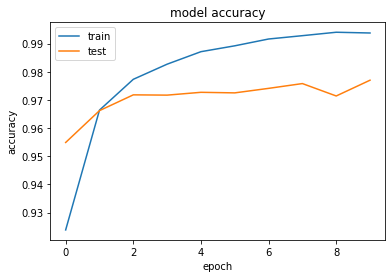

In [2]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

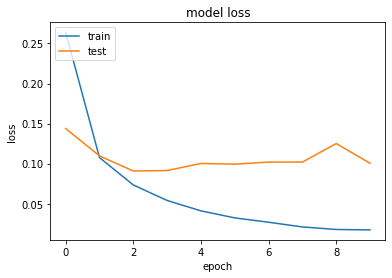

In [3]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

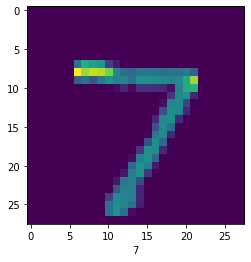

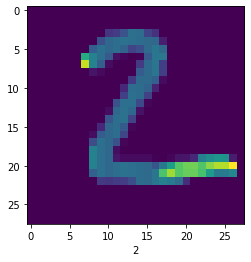

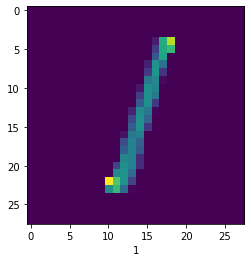

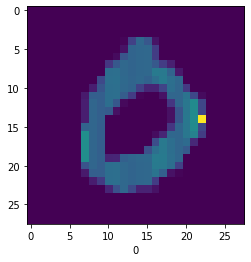

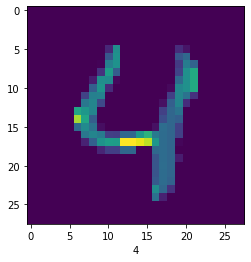

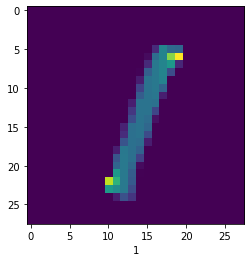

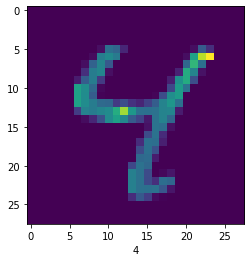

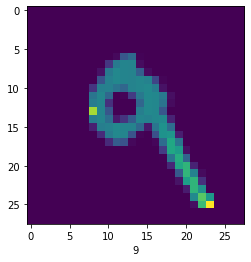

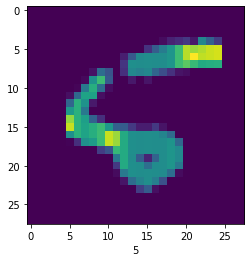

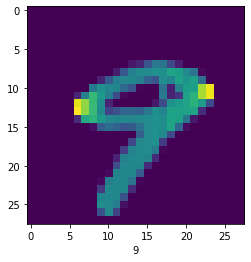

In [4]:
predictions = model.predict([x_test])

for x in range(10):
    plt.imshow(x_test[x])
    plt.xlabel(np.argmax(predictions[x]))
    plt.show()